### Задание №1
1. Есть два файла - advertiser.csv и stats.csv. Полю id в advertiser.csv соотвествует поле advertiser_fk в stats.csv.
Задача: С помощью python сделать графики расходования бюджета (cost) по дням по каждому рекламодателю(advertiser). То же самое для метрики CPI(Cost per install). Вывести таблицу расходования общего бюджета по всем рекламодателям по дням

In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = [14, 7]
import warnings
warnings.filterwarnings('ignore')

In [2]:
advertise = pd.read_csv(r'C:\Users\Андрей Клычев\Desktop\advertiser.csv')
stats = pd.read_csv(r'C:\Users\Андрей Клычев\Desktop\stats.csv')

In [3]:
advertise.rename(columns={'id': 'advertiser_fk'}, inplace=True)

In [4]:
joined = stats.join(advertise, on='advertiser_fk', how='outer', lsuffix='_l', rsuffix='_r')
joined_costs = joined.reindex(columns=['name', 'updated_at_l', 'name_l', 'campaign_id', 'cost', 'date', 'installs'])

In [5]:
joined_costs = joined_costs.dropna(subset=['date'])
joined_costs = joined_costs.fillna(0)
joined_costs

,name,updated_at_l,name_l,campaign_id,cost,date,installs
0.0,Adv3,0.0,0.0,1.685705e+15,0.01,2020-12-31,0.0
1.0,Adv3,0.0,0.0,1.676916e+15,0.11,2020-12-31,1.0
2.0,Adv3,0.0,0.0,1.684500e+15,0.03,2020-12-31,0.0
3.0,Adv3,0.0,0.0,1.685515e+15,0.14,2020-12-31,0.0
4.0,Adv3,0.0,0.0,1.685709e+15,0.01,2020-12-31,0.0
...,...,...,...,...,...,...,...
3202.0,Adv4,0.0,0.0,1.668390e+15,0.10,2020-12-03,0.0
3203.0,Adv4,0.0,0.0,1.668390e+15,0.00,2020-12-03,0.0
3204.0,Adv4,0.0,0.0,1.668390e+15,6.88,2020-12-03,0.0
3207.0,Adv4,0.0,0.0,1.668390e+15,9.91,2020-12-03,3.0


In [6]:
joined_costs = joined_costs[joined_costs['name'] != 0].reset_index(drop=True)

In [7]:
ar = [pd.Timestamp(_) if _ != 0 else 0 for _ in joined_costs.date.values]

joined_costs.date = ar

CPI = []
for _ in range(len(joined_costs)):
    try:
        CPI.append(round((joined_costs.cost[_] / joined_costs.installs[_]), 4))
    except:
        CPI.append(0)
    
joined_costs['CPI'] = CPI

Ниже приведены объединенные графики значений расходов бюджета cost и метрики CPI по тем рекламодателям, у которых были  
расходы за указанный период.  
Данное совмещение показателей на графиках наглядно показывает эффективность расходов.

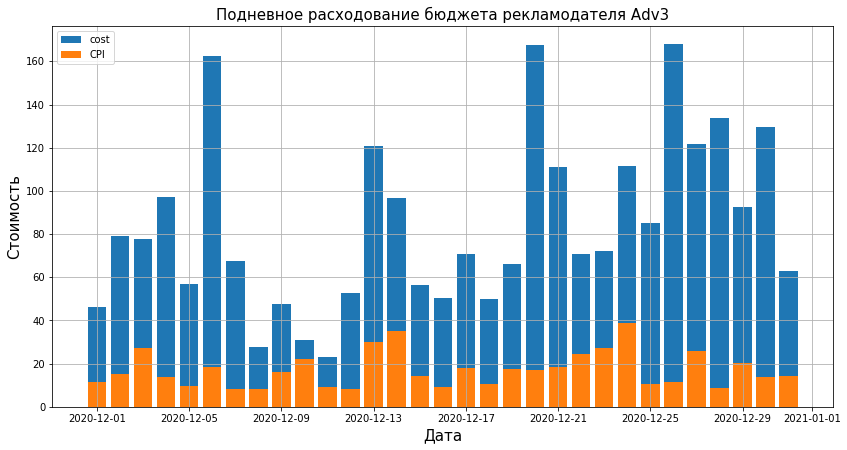

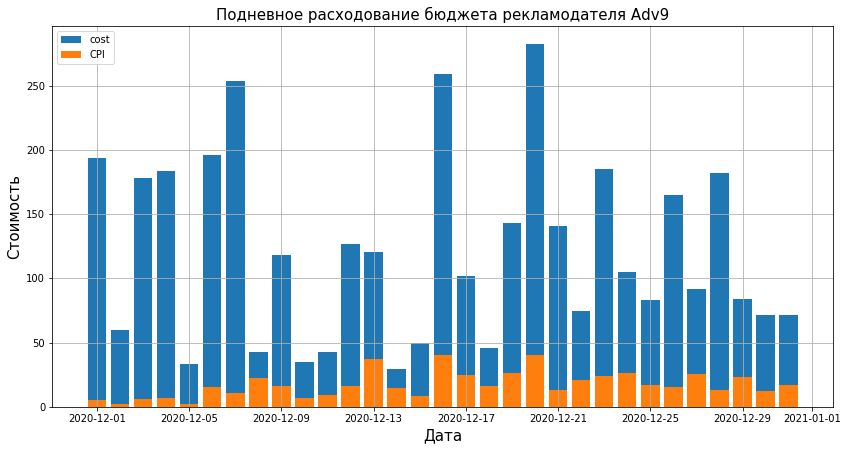

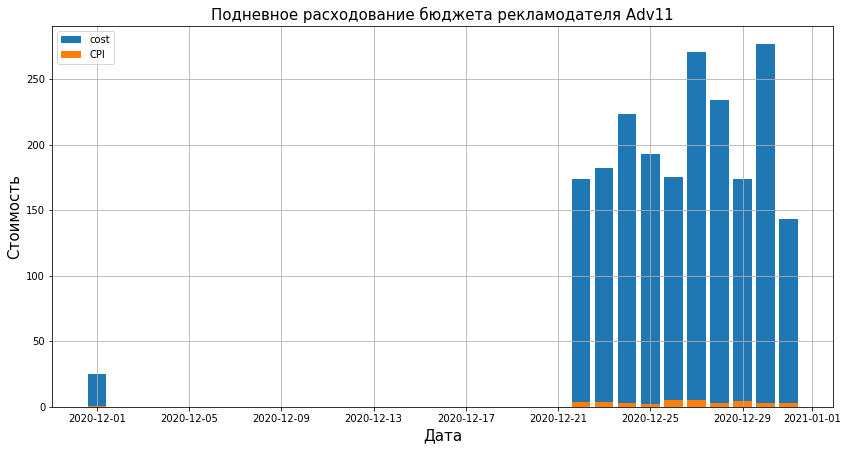

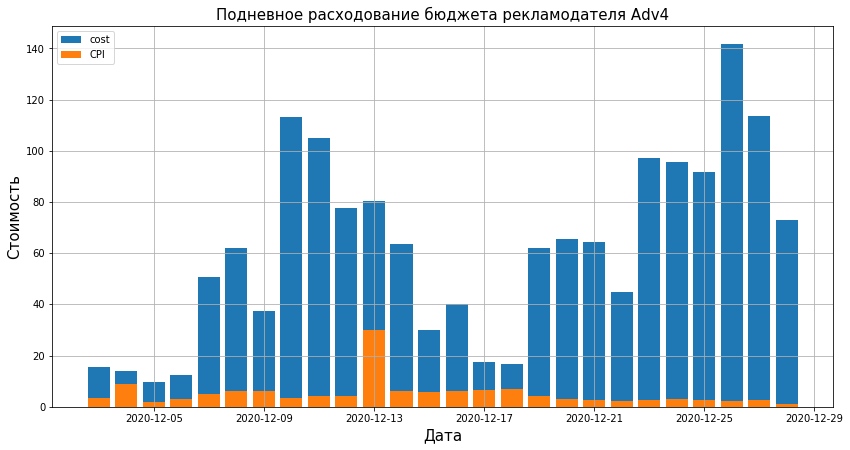

In [8]:
for i in joined_costs.name.unique():
    plt.bar(joined_costs[joined_costs['name']==i].date, joined_costs[joined_costs['name']==i].cost, label='cost')
    plt.bar(joined_costs[joined_costs['name']==i].date, joined_costs[joined_costs['name']==i].CPI, label='CPI')
    plt.title("Подневное расходование бюджета рекламодателя "+i, size=15)
    plt.legend(loc=2)
    plt.xlabel('Дата', size=15)
    plt.ylabel('Стоимость', size=15)
    plt.grid()
    plt.show()

Ниже приведена таблица суммарных подневных расходов рекламодателей, имевших расходы за указанный период

In [10]:
pd.pivot_table(joined_costs, index='date', columns='name', aggfunc=sum, \
                    margins = True, margins_name = 'Total')['cost'].fillna(0)

name,Adv11,Adv3,Adv4,Adv9,Total
date,,,,,
2020-12-01 00:00:00,41.54,260.78,0.00,230.07,532.39
2020-12-02 00:00:00,0.00,434.34,0.00,75.13,509.47
2020-12-03 00:00:00,0.00,525.24,34.23,215.10,774.57
2020-12-04 00:00:00,0.00,341.26,33.13,277.47,651.86
2020-12-05 00:00:00,0.00,243.21,16.00,64.06,323.27
2020-12-06 00:00:00,0.00,539.46,18.74,426.19,984.39
2020-12-07 00:00:00,0.00,286.60,70.75,561.59,918.94
2020-12-08 00:00:00,0.00,124.66,140.58,206.35,471.59
2020-12-09 00:00:00,0.00,137.77,120.24,321.32,579.33


### Задание №2
2. Структура данных (исходные файлы) как в первом задании. Составьте SQL запрос, позволяющий сделать таблицу, в которой будут показы, клики, инсталлы, CPI, расход по дням по каждому рекламодателю.

In [ ]:
'''
SELECT s.date, a.name, SUM(s.impressions) AS "Показы", SUM(s.clicks) AS "Клики", SUM(s.installs) AS "Установки", 
SUM(s.cost) AS "Расход", ROUND((SUM(s.cost) / SUM(s.installs)), 2) AS CPI 
FROM stats s JOIN advertiser a ON s.advertiser_fk = a.id
GROUP BY 1, 2
ORDER BY 1;
'''

### Задание №3
3. Рассчитать ширину тротуара так, чтобы пешеходы не толпились и не сталкивались между собой. Построить модель. Все необходимые параметры и условия можете придумать сами. Задача не имеет конкретного решения, здесь нужно показать ход ваших мыслей.


In [12]:
import numpy as np
import random
import time

a = 50 Ширина плеч среднего взрослого мужчины

n = 3 Rол-во полос движения для пешеходов, в первом приближении их 3 - предполагается по одной  
полосе для движения в каждую сторону и одна полоса для обгона

В первом приближении ширина тротуара составляет 150 см, и может быть увеличена в случае, если поток пешеходов достаточно
велик


Модель, которую я бы хотел реализовать, в общепринятой терминологии принято называть моделью клеточного автомата.
В этой модели тротуар представляется в виде массива размерности [l, n], где l - длина тротуара, n - ширина тротуара.  
Пешеход начинает движение вступлением на тротуар с определенного конца (левого или правого), после чего изменяет свою координату в данном массиве на единицу вдоль размерности l за каждую итерацию.  
Значение координаты n пешеход выбирает каждый раз случайным образом увеличивая или уменьшая на единицу, но в пределах (1, n), он может менять координату n свободно до тех пор, пока не окажется так, что выбранная координата уже занята, и тогда он принуждается к выбору любой из оставшихся свободных значений n, в случае, когда таковых не остается запускается процесс задержки time.sleep(), и пешеход ждет несколько секунд, чтобы еще раз попробовать выбрать свободную координату n. Данный сценарий с задержкой является ситуацией с возникновением  
столпотворения на отдельном участке. В этой модели входными значениями являются - ширина тротуара (n) и кол-во пешеходов,  
вступающих на тротуар. При возникновении ситуации столпотворения следует увеличить ширину тротуара на 1+ значений.

Для создании подобной симуляции на python мне потребовалось бы несколько больше времени, прошу понять :)

In [443]:
# V1 = 0.1 скорость движения быстрого пешехода
# V2 = 0.2 скорость движения пешехода со средней скоростью
# V3 = 0.3 скорость движения медленного пешехода

# N = 10 Количество пешеходов вступающих на тротуар в данный момент времени


# Создаем список из пешеходов различной скорости
# auxilary = [np.random.choice([V1, V2, V3]) for _ in range(N)]
# Случайным образом задаем сколько пешеходов заступает на тротуар с левой и правой стороны
# left_side = sorted(auxilary[int(np.random.choice([0.3, 0.5, 0.7])*N):], reverse=True)
# right_side = sorted(auxilary[:(N-len(left_side))], reverse=True)

# print(left_side, right_side)

In [429]:
N = 3
length = 6
class Man():  
        
    def __init__(self, side, N, s=random.randint(1, 3), i=0):
        self.s = s
        self.k = self.s
        self.i = i
        self.side = side
        self.N = N
        
    def increase_coord(self):
        
        
        if self.side == 'l':
            self.sign = 1
        else:
            self.sign = -1
        
        self.k = self.k + np.random.choice([0, 1, -1])
        
        if self.k > self.N:
            self.k = self.N
            
        elif self.k < 1:
            self.k = 1
            
        self.i = (self.i + 1)*self.sign
        
        return self.i, self.k
    
    def delete(self, length):
        if abs(self.i) > 6:
            self.__del__(self)
    
    
_1 = Man('l', N)
_2 = Man('r', N)      